In [349]:
import matplotlib.pyplot as plt

import statistics

import scipy.linalg as scln
from scipy.stats import multivariate_normal
from scipy.spatial import distance

from numpy.linalg import inv
import numpy as np
import numpy.linalg as nplin

In [350]:
def samplegenerator(sample_size, prior):
    a = np.random.choice(2,sample_size,prior)
    count = 0
    for i in a:
        if i == 1:
            count = count+1
    sampledset = [sample_size-count,count]
    return(sampledset)

In [351]:
def plot_lda(y1,y2,thresh):
    y_axis=[5 for x in range(len(y1))]
    g_axis=[2 for x in range(len(y2))]
    plt.axvline(x=thresh)
    plt.plot(y1,y_axis,'x',label = 'class1')
    plt.plot(y2,g_axis,label = 'class2',)
    plt.legend()
    plt.title("LDA decision boundary")
    plt.plot()
    
def LDAError(checker,prior_err):
    plt.plot(checker,prior_err)
    plt.title("graph for error vs X")

In [352]:
def multivariate_Gaussian(mean, cov, sample):
    return ((np.random.normal(size=(sample, cov.shape[0]))).dot(scln.cholesky(cov))+mean)

# Solution 3.1

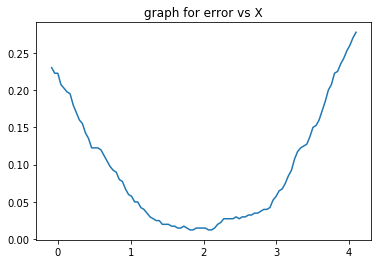

In [353]:
p = [0.5,0.5]
samplesize = 400
samplingset = samplegenerator(samplesize, p)

mean = np.array([0,0])
mean1 = np.array([3,3])

cov = np.identity(2)
cov1 = np.identity(2)

x = multivariate_Gaussian(mean, cov, samplingset[0]).T
x1 = multivariate_Gaussian(mean1, cov1, samplingset[1]).T

mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])

mean1=mean1.reshape(-1,1)
mean2=mean2.reshape(-1,1)

s_b=(mean1-mean2)@(mean1-mean2).T
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)

w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1

minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)

p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
 

LDAError(check,p_err)

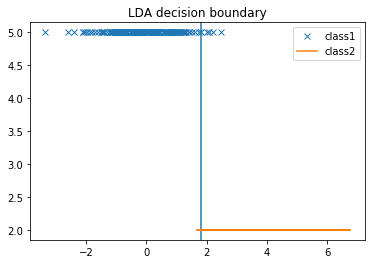

In [354]:
i=np.argmin(np.array(p_err))
threshold=check[i]
plot_lda(y1,y2,threshold)

#  Solution 3.2

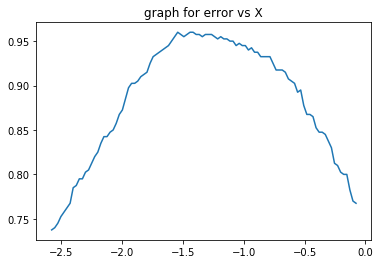

In [370]:
p = [0.5,0.5]
samplesize = 400
samplingset = samplegenerator(samplesize, p)

mean = np.array([0,0])
mean1 = np.array([3,3])

cov = np.matrix([[3,1],[1,.8]],dtype=float)

x = multivariate_Gaussian(mean, cov, samplingset[0]).T
x1 = multivariate_Gaussian(mean1, cov, samplingset[1]).T

mean = mean.reshape([2,1])
mean1 = mean1.reshape([2,1])

mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])

mean1=mean1.reshape(-1,1)
mean2=mean2.reshape(-1,1)

s_b=(mean1-mean2)@(mean1-mean2).T
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
 

LDAError(check,p_err)

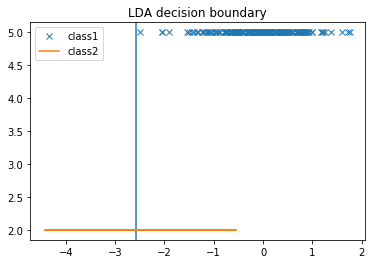

In [371]:
i=np.argmin(np.array(p_err))
threshold=check[i]
plot_lda(y1,y2,threshold)

# Solution 3.3

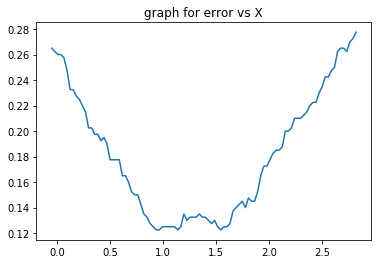

In [367]:
p = [.5,.5]
samplesize = 400
samplingset = samplegenerator(samplesize, p)

mean = np.array([0,0])
cov = np.matrix([[2,.5],[.5,1]],dtype=float)

x = multivariate_Gaussian(mean, cov, samplingset[0]).T
mean = mean.reshape([2,1])
covinv = cov.I
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([2,2])
cov1 = np.matrix([[2,-1.9],[-1.9,5]],dtype=float)
x1 = multivariate_Gaussian(mean1, cov1, samplingset[1]).T
mean1 = mean1.reshape([2,1])
mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
 

LDAError(check,p_err)

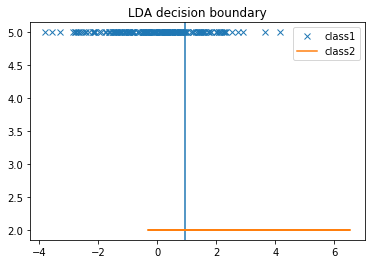

In [368]:
i=np.argmin(np.array(p_err))
threshold=check[i]
plot_lda(y1,y2,threshold)

# Solution 3.4

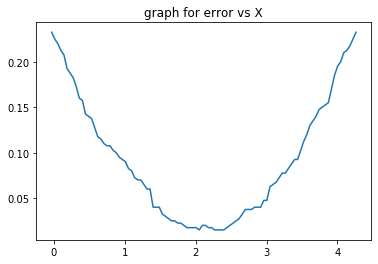

In [369]:
p = [.05,.95]
samplesize = 400
samplingset = samplegenerator(samplesize, p)
mean = np.array([0,0])
cov = np.identity(2)

x = multivariate_Gaussian(mean, cov, samplingset[0]).T
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([3,3])
cov1 = np.identity(2)

x1 = multivariate_Gaussian(mean1, cov1, samplingset[1]).T
mean1 = mean1.reshape([2,1])
mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T

s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
 

LDAError(check,p_err)

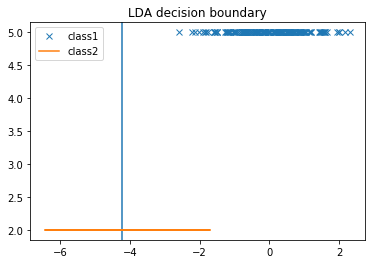

In [360]:
i=np.argmin(np.array(p_err))
threshold=check[i]
plot_lda(y1,y2,threshold)

#  Solution 3.5

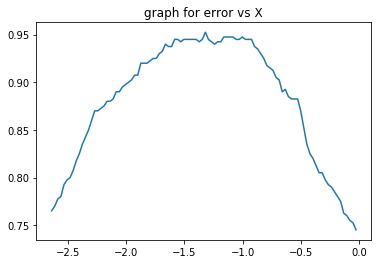

In [379]:
p = [.05,.95]
samplesize = 400
samplingset = samplegenerator(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[3,1],[1,.8]],dtype=float)

x = multivariate_Gaussian(mean, cov, samplingset[0]).T
mean = mean.reshape([2,1])
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([3,3])
x1 = multivariate_Gaussian(mean1, cov, samplingset[1]).T
mean1 = mean1.reshape([2,1])
mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
 

LDAError(check,p_err)

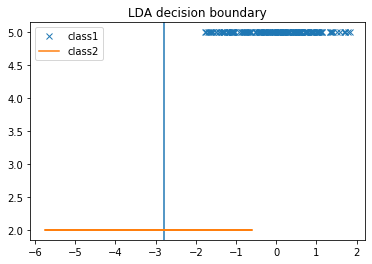

In [362]:
i=np.argmin(np.array(p_err))
threshold=check[i]
plot_lda(y1,y2,threshold)

# Solution 3.6

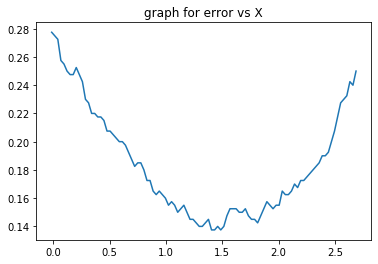

In [363]:
p = [.05,.95]
samplesize = 400
samplingset = samplegenerator(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[2,.5],[.5,1]],dtype=float)

x = multivariate_Gaussian(mean, cov, samplingset[0] ).T
mean = mean.reshape([2,1])
covinv = cov.I
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([2,2])
cov1 = np.matrix([[2,-1.9],[-1.9,5]],dtype=float)

x1 = multivariate_Gaussian(mean1, cov1, samplingset[1] ).T
mean1 = mean1.reshape([2,1])
mean1 = mean1.reshape([2,1])
mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
 

LDAError(check,p_err)


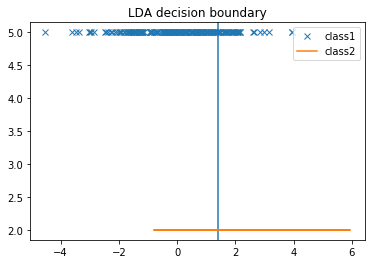

In [364]:
i=np.argmin(np.array(p_err))
threshold=check[i]
plot_lda(y1,y2,threshold)